In [2]:
import pandas as pd
df = pd.read_csv('https://bit.ly/ds-house-price-clean')
df.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_

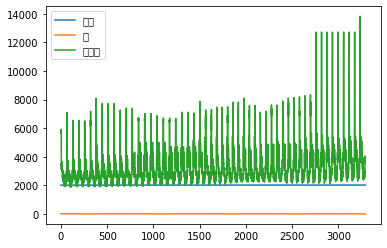

In [ ]:
df.plot()

# 한글 폰트가 깨지는 현상 방지

### 1단계

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
# 옛날에 해상도안좋을 때 선명하게해주기
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')


### 2단계 상단 메뉴 런타임 런타임다시시작 모두실행

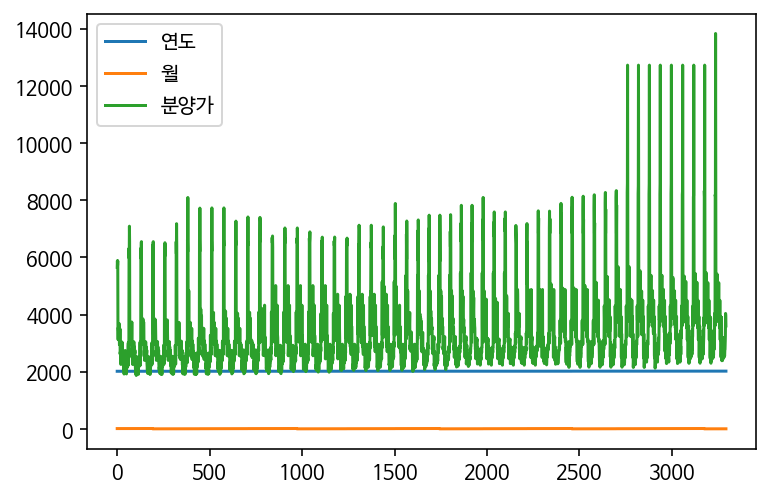

In [ ]:
df.plot()

## 그래프의 설정 변경

In [ ]:
plt.rcParams["figure.figsize"] = (12,9) #가로, 세로인치

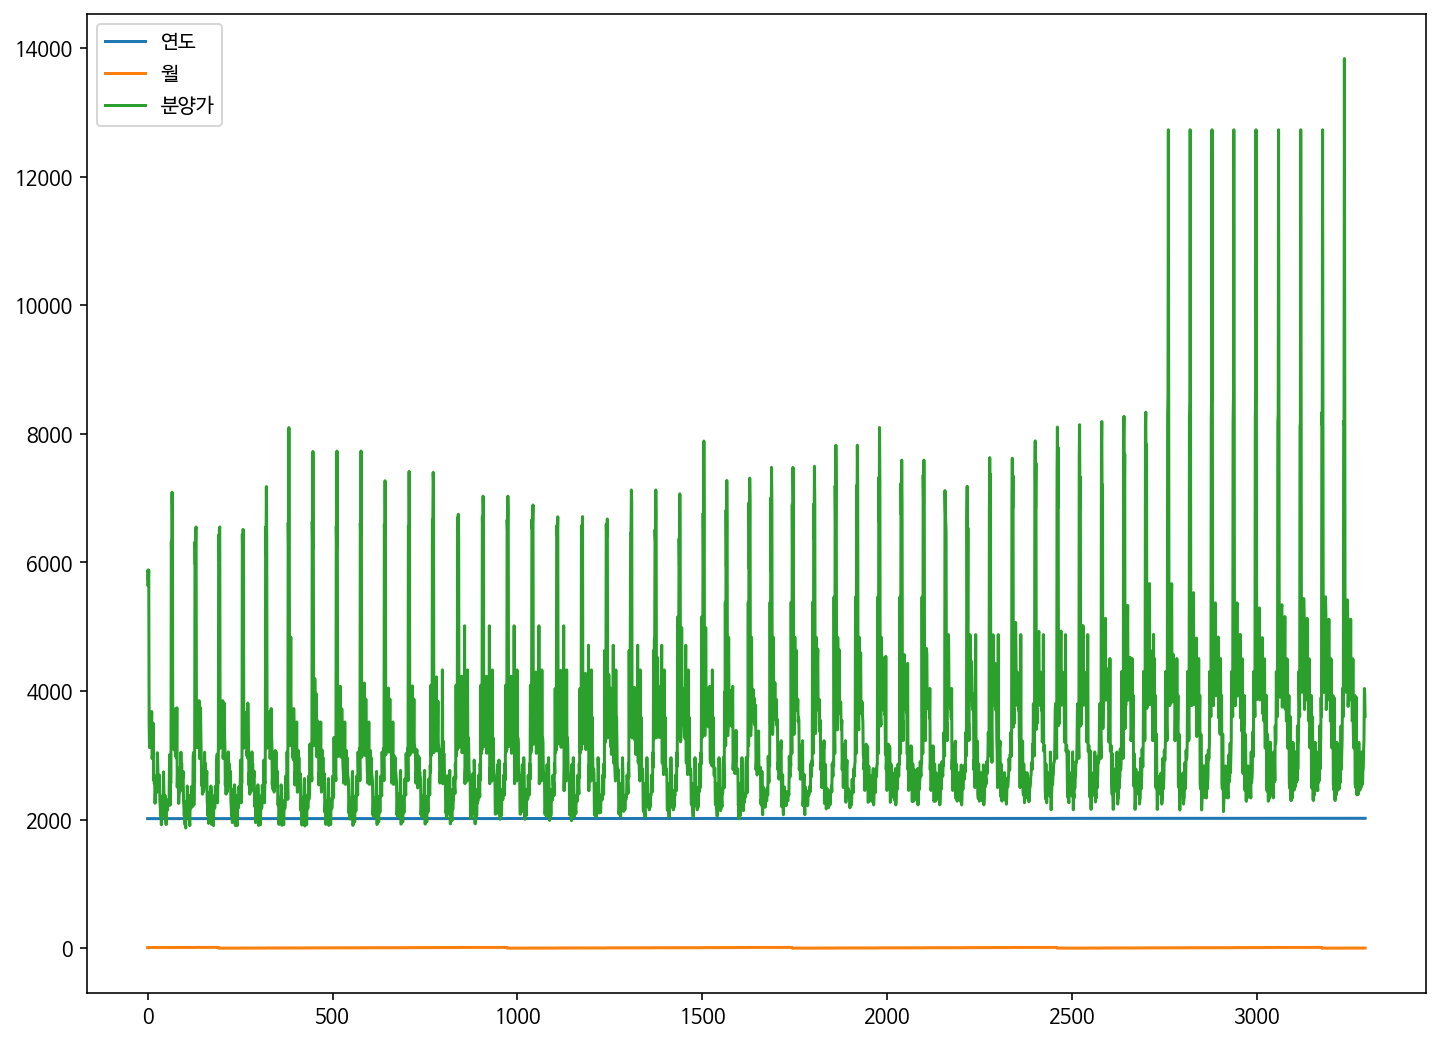

In [ ]:
df.plot()

# 판다스 데이터 프레임 시각화

## 1.plot 그래프
plot = 일반 선그래프
kind옵션을 이용해 원하는 그래프 그릴 수 있다.
  - line : 선그래프
  - bar : 바그래프(수직바)
  - barh : 수평바그래프 bar horizontal
  - hist : 히스토그램
  - kde : 커널밀도그래프
  - hexbin : 고밀도 산점도 그래프
  - box : 박스플롯
  - area : 면적그래프
  - pie : 파이그래프
  - scatter : 산점도그래프

## line 그래프
- 데이터가 연속적인 특징을 띄고 있을 때 사용하기 좋다.
  - ex) 주가데이터
  - 아파트 분양데이터
  - 시계열 데이터

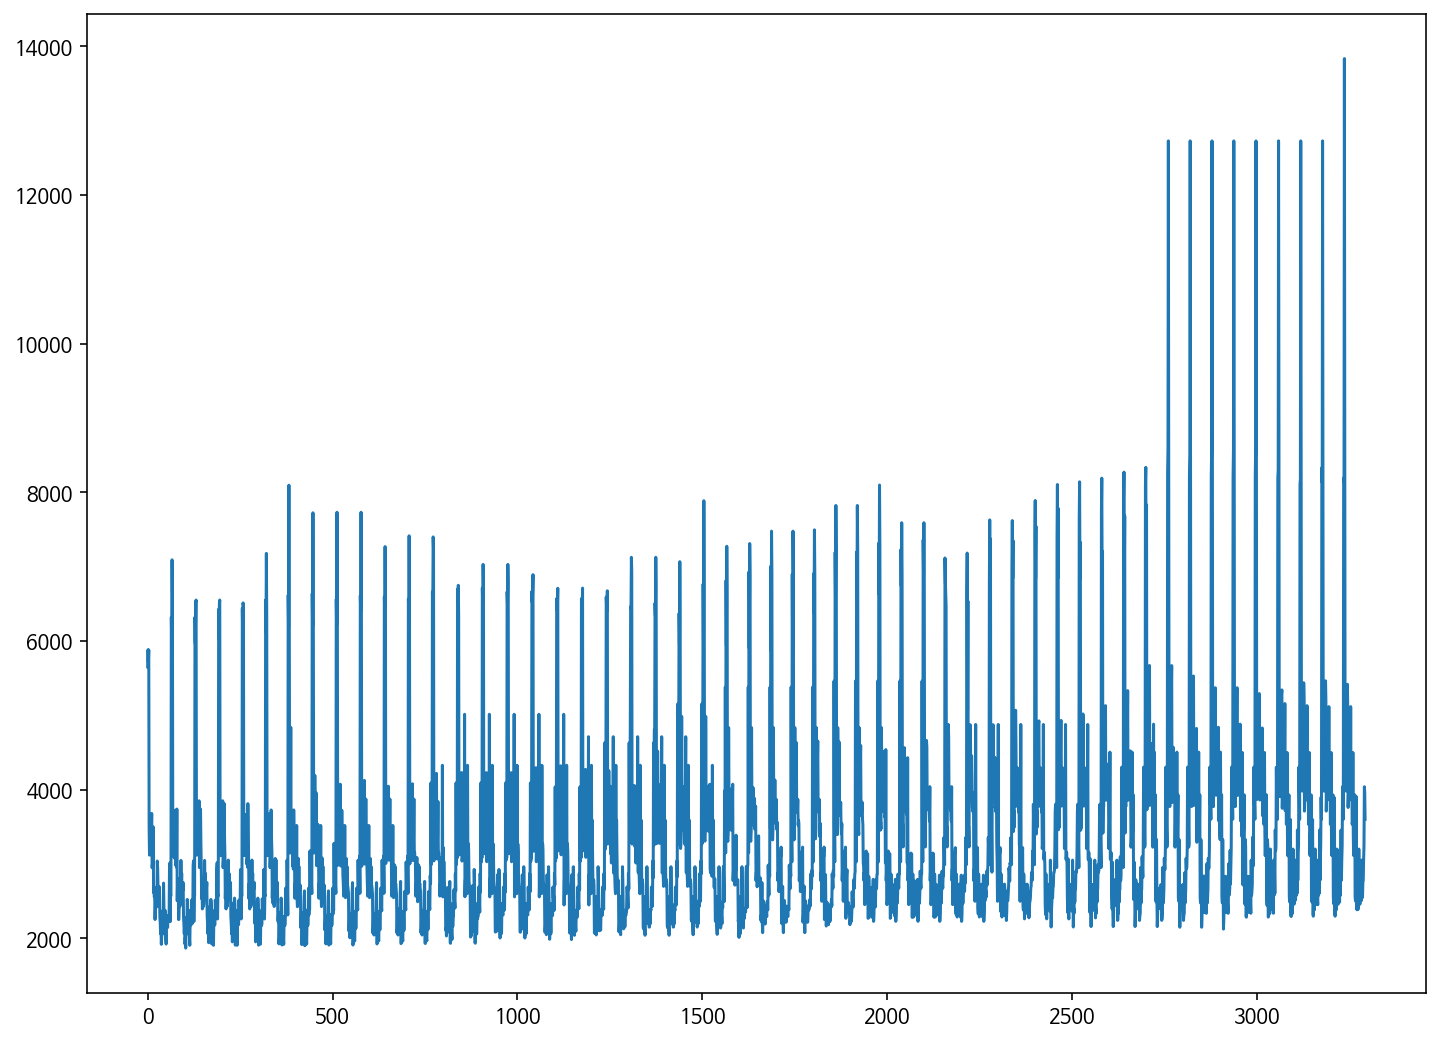

In [ ]:
df['분양가'].plot(kind='line')

## 서울시의 연도별 분양가 평균을 시각화
2015, 2016, 2017.. 년도별로

In [3]:
import pandas as pd
df_seoul = df.loc[df["지역"]== "서울"]
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


In [4]:
df_seoul_year = df_seoul.groupby("연도")[["분양가"]].mean()
df_seoul_year

,분양가
연도,
2015,6201.000000
2016,6674.520833
2017,6658.729167
2018,7054.687500
2019,8735.083333
2020,9647.375000


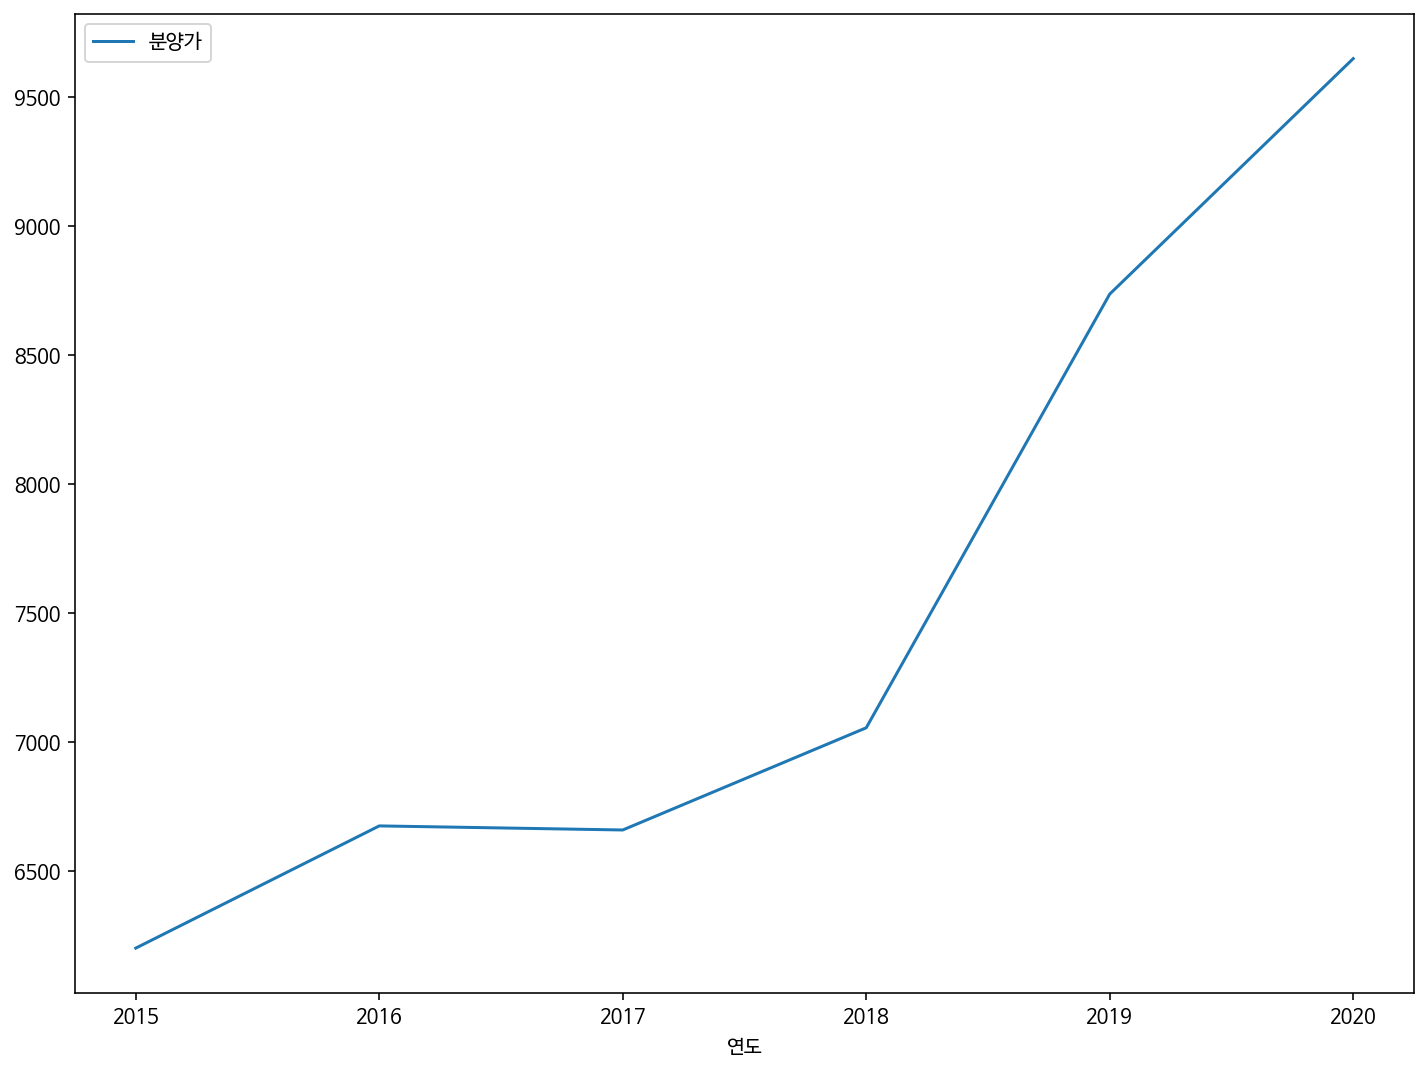

In [ ]:
df_seoul_year.plot(kind="line")

## bar 그래프
- 그룹별(카테고리별)로 비교할 때 유용

# 지역별 분양가 평균

In [ ]:
local_mean = df.groupby("지역")[["분양가"]].mean()
local_mean

,분양가
지역,
강원,2448.156863
경기,4133.952830
경남,2858.932367
경북,2570.465000
광주,3055.043750
대구,3679.620690
대전,3176.127389
부산,3691.981132
서울,7308.943396


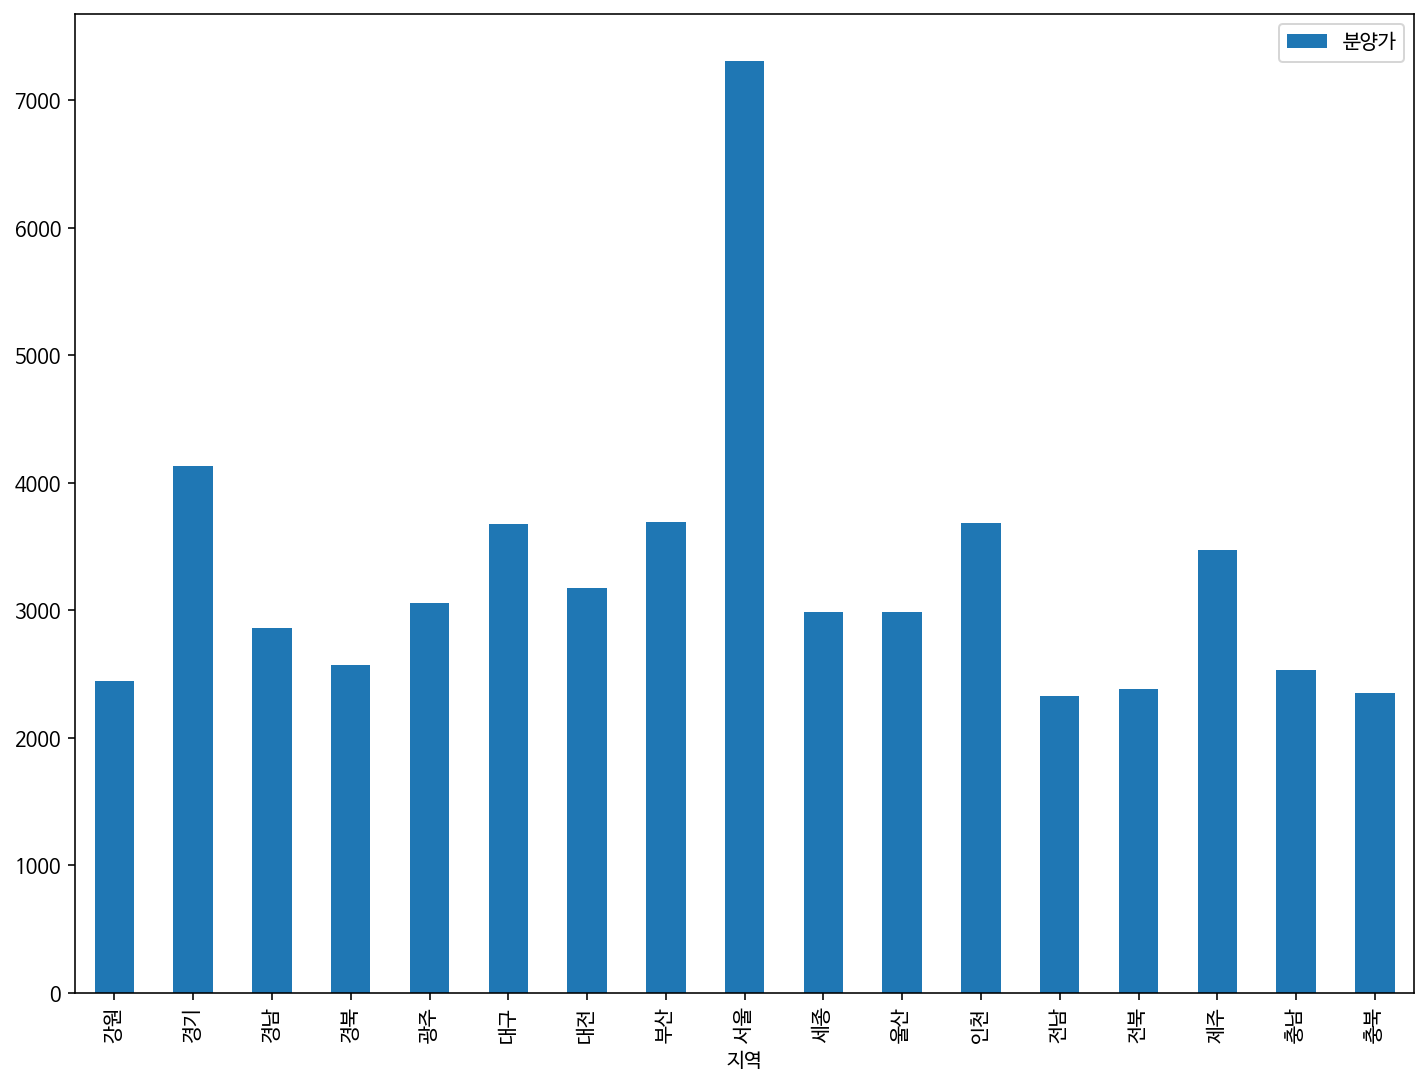

In [ ]:
local_mean.plot(kind="bar")

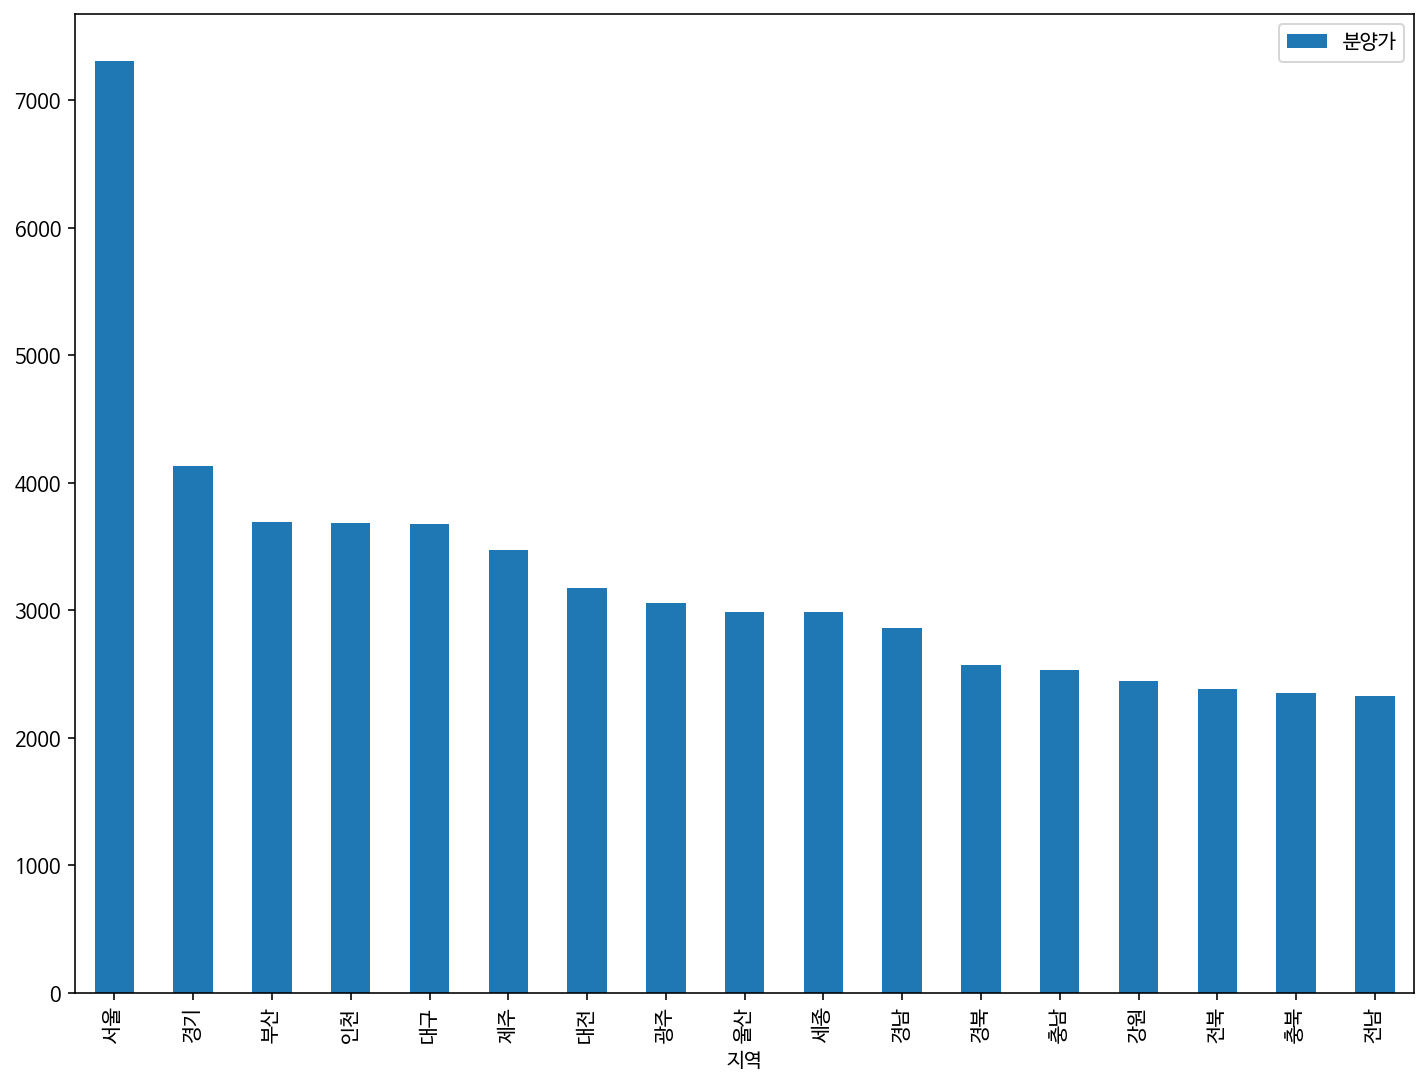

In [ ]:
# 분양가 내림차순으로 정리해서 시각화
df3 = local_mean.sort_values(by = "분양가", ascending = False)
df3.plot(kind='bar')

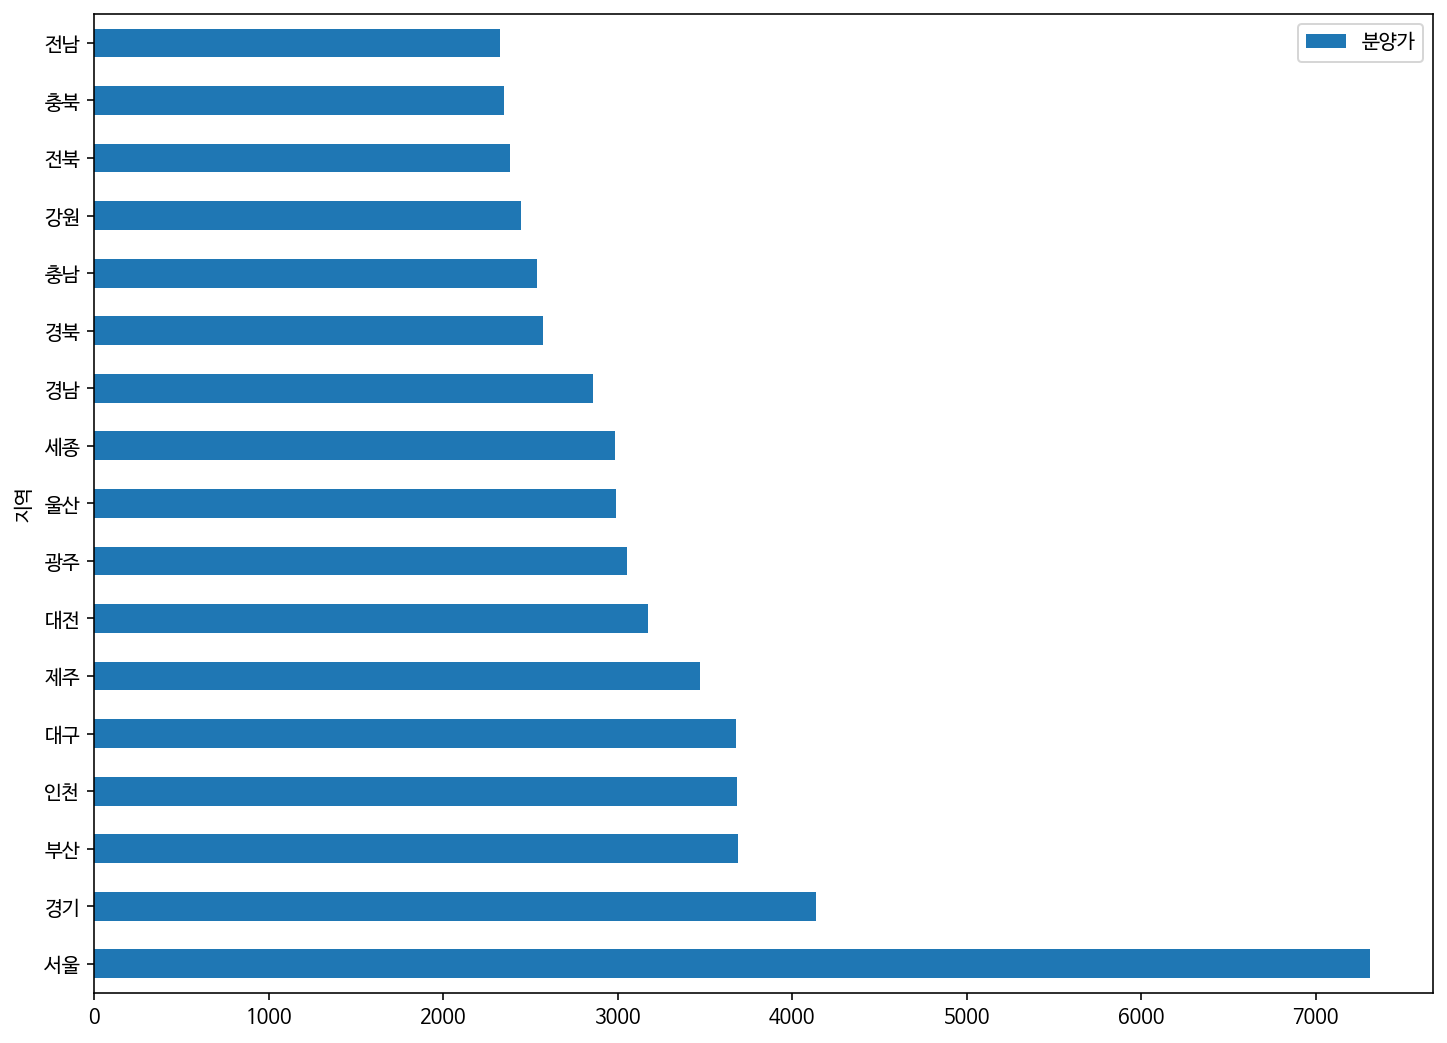

In [ ]:
df3.plot(kind="barh")

# 히스토그램(hist)
- 분포, 빈도를 시각화해서 보여준다
- 가로축 : 데이터의 구간
- 세로축 : 빈도

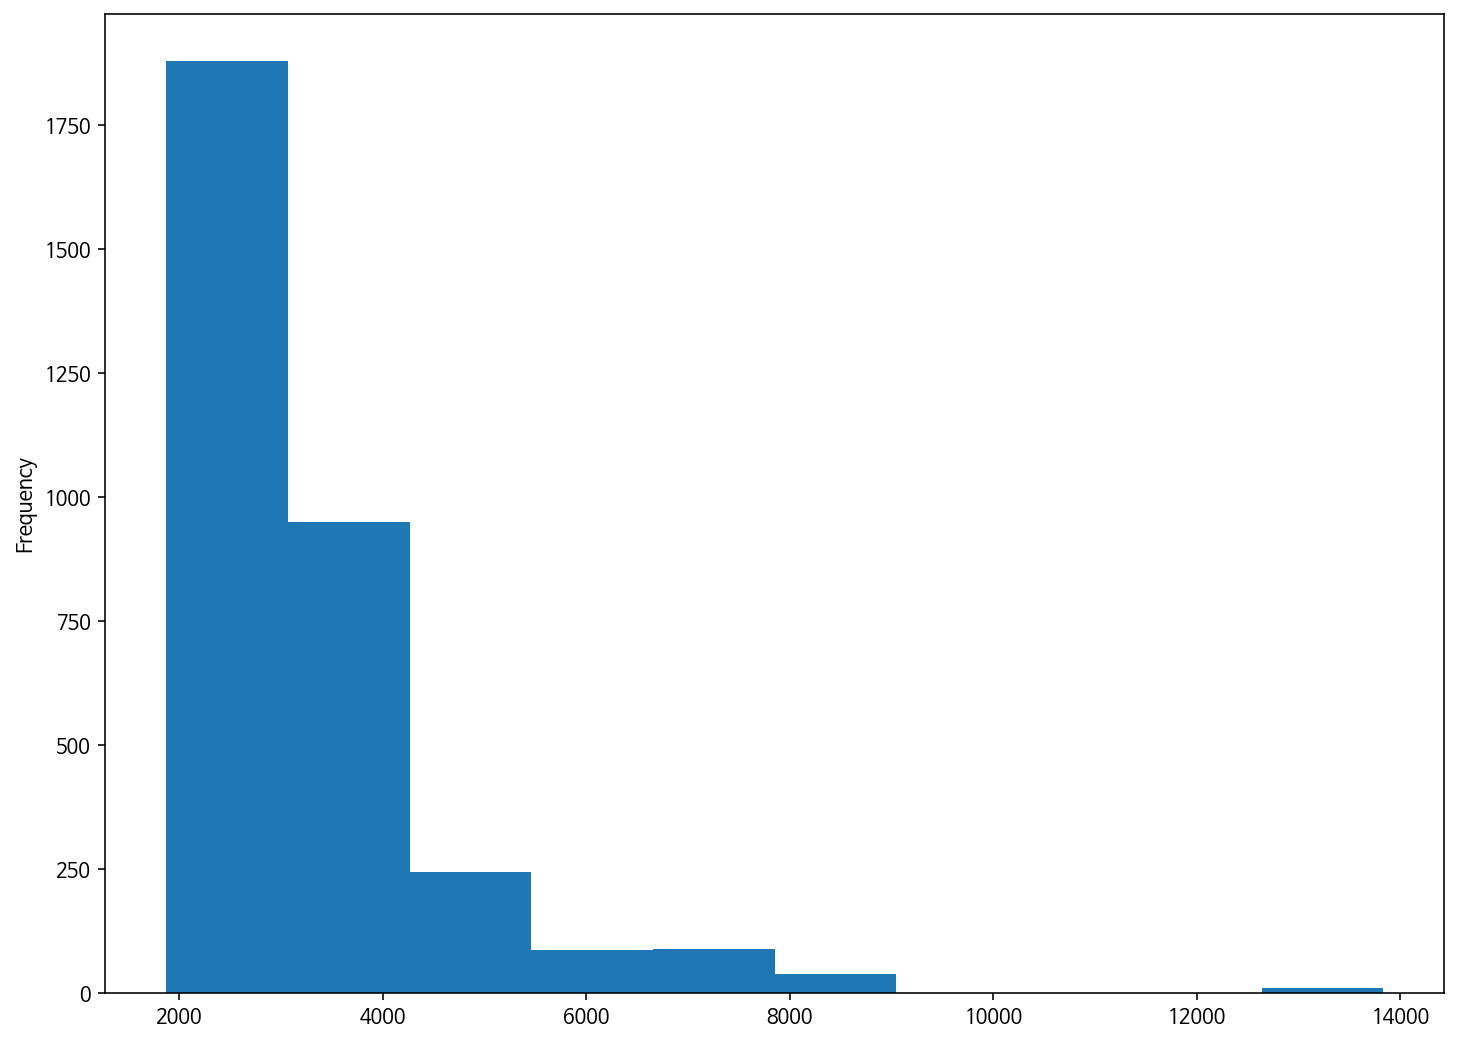

In [ ]:
# 분양가의 구간별 빈도수
df["분양가"].plot(kind="hist")

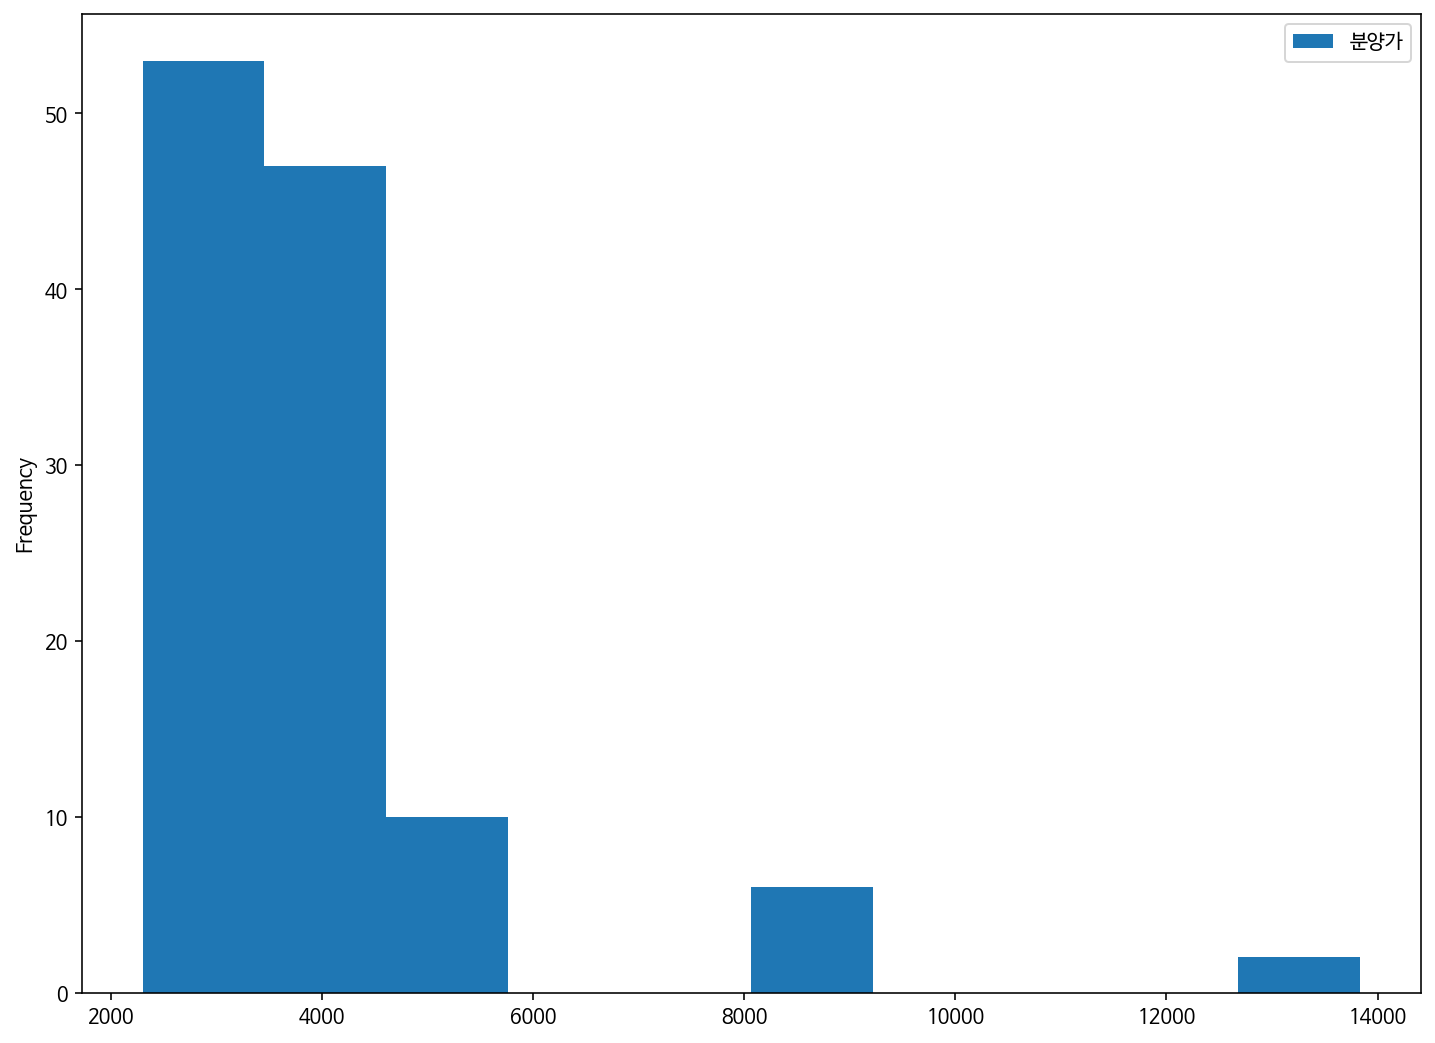

In [ ]:
# 2020년 분양가의 히스토그램
df.loc[df["연도"] == 2020][['분양가']].plot(kind="hist")

# 박스 플롯(box)
  - 데이터의 최대, 최소, 평균, 중간값등 집계된 정보를 한눈에 볼 수 있게.
  - 대표값들 !!

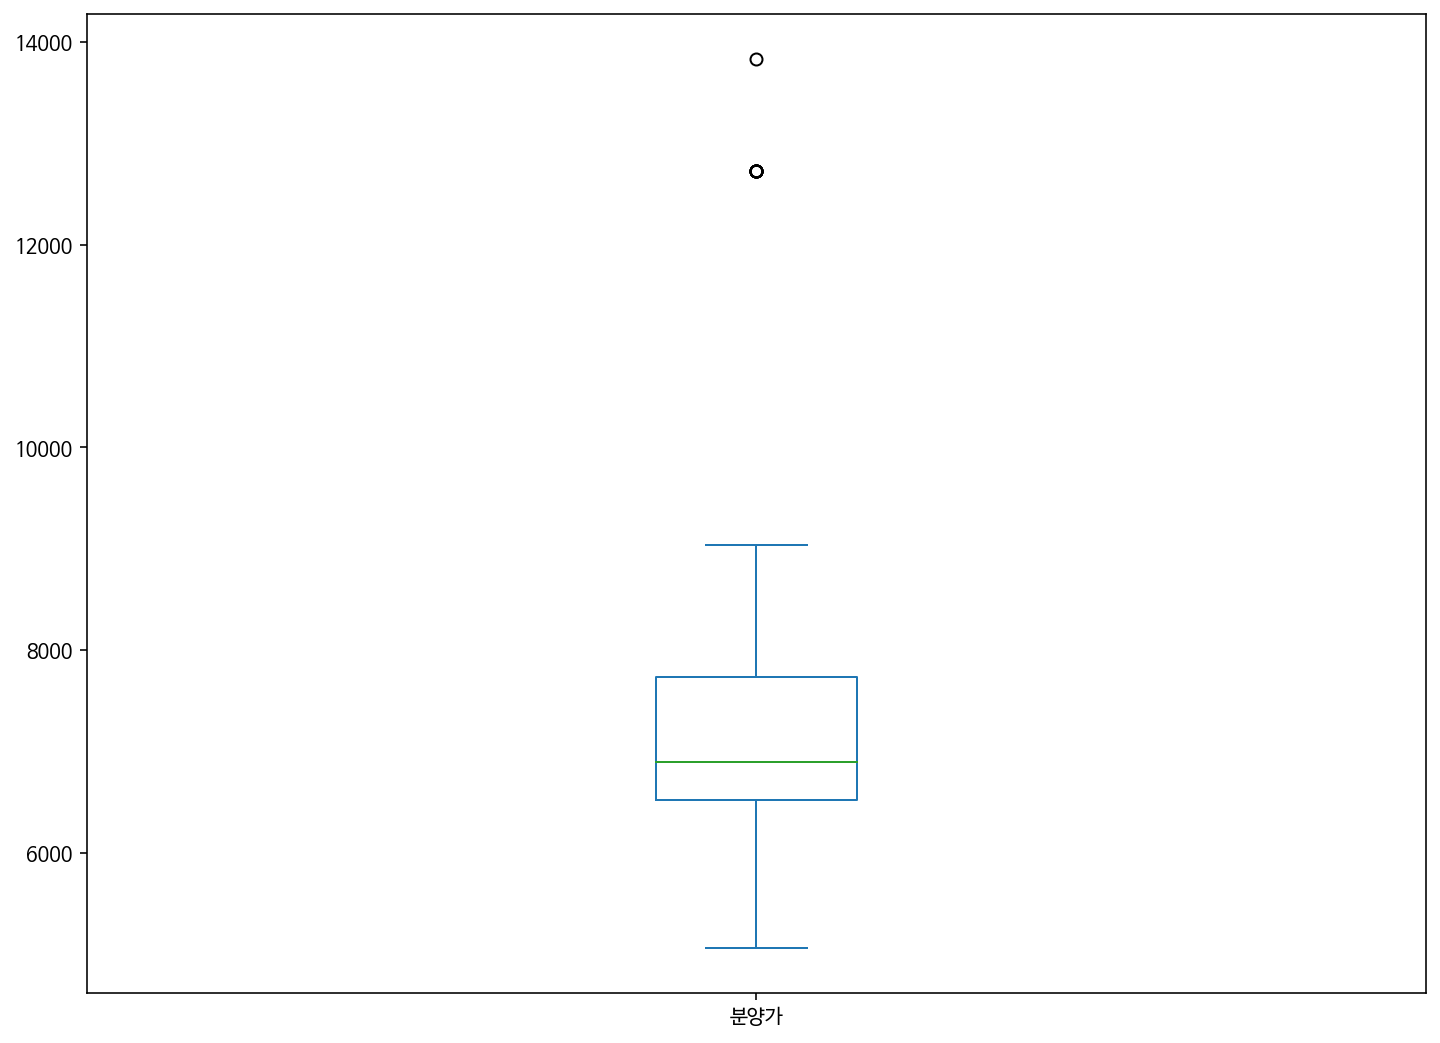

In [ ]:
df_seoul = df.loc[df["지역"] == "서울"]
df_seoul[["분양가"]].plot(kind="box")

# 위에 점두개는 이상치(outlier) 제거대상.

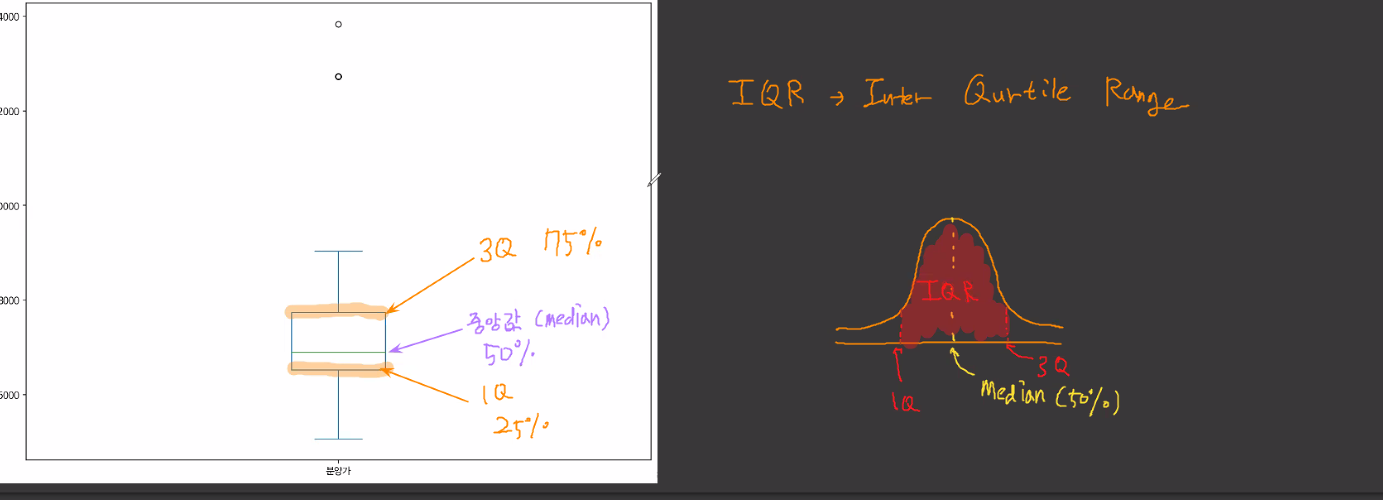

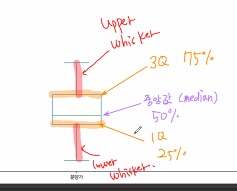

박스안: 의미있는데이터

위스커: 그래 IQR 넘어가도 여기까진 데이터로 인정해줄게 허용범위

In [ ]:
df_seoul.describe()[['분양가']]

,분양가
count,212.000000
mean,7308.943396
std,1402.869496
min,5061.000000
25%,6519.750000
50%,6895.500000
75%,7732.000000
max,13835.000000


##IQR : inter quantile range 계산법

IQR = (3Q - 1Q)

IQR * 1.5해서 구함

ex) (7732 - 6519.75) * 1.5

upper whisker = Q3 + (Q3-Q1)*1.5 (상한이상치)

lower whisker = Q1 - IQR*1.5 (하한이상치)

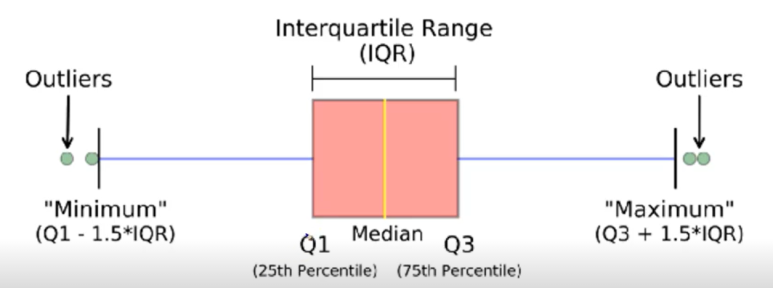

박스 플롯은 이상치(outlier) 감지를 할때 사용

## scatter(산점도)
- 점으로 데이터를 표시
- x,y값 다넣어줘야함
- x,y축을 지정해주면 그에 맞는 데이터 분포도를 볼 수 있다.
- x,y모두 수치형 데이터만 가능!!

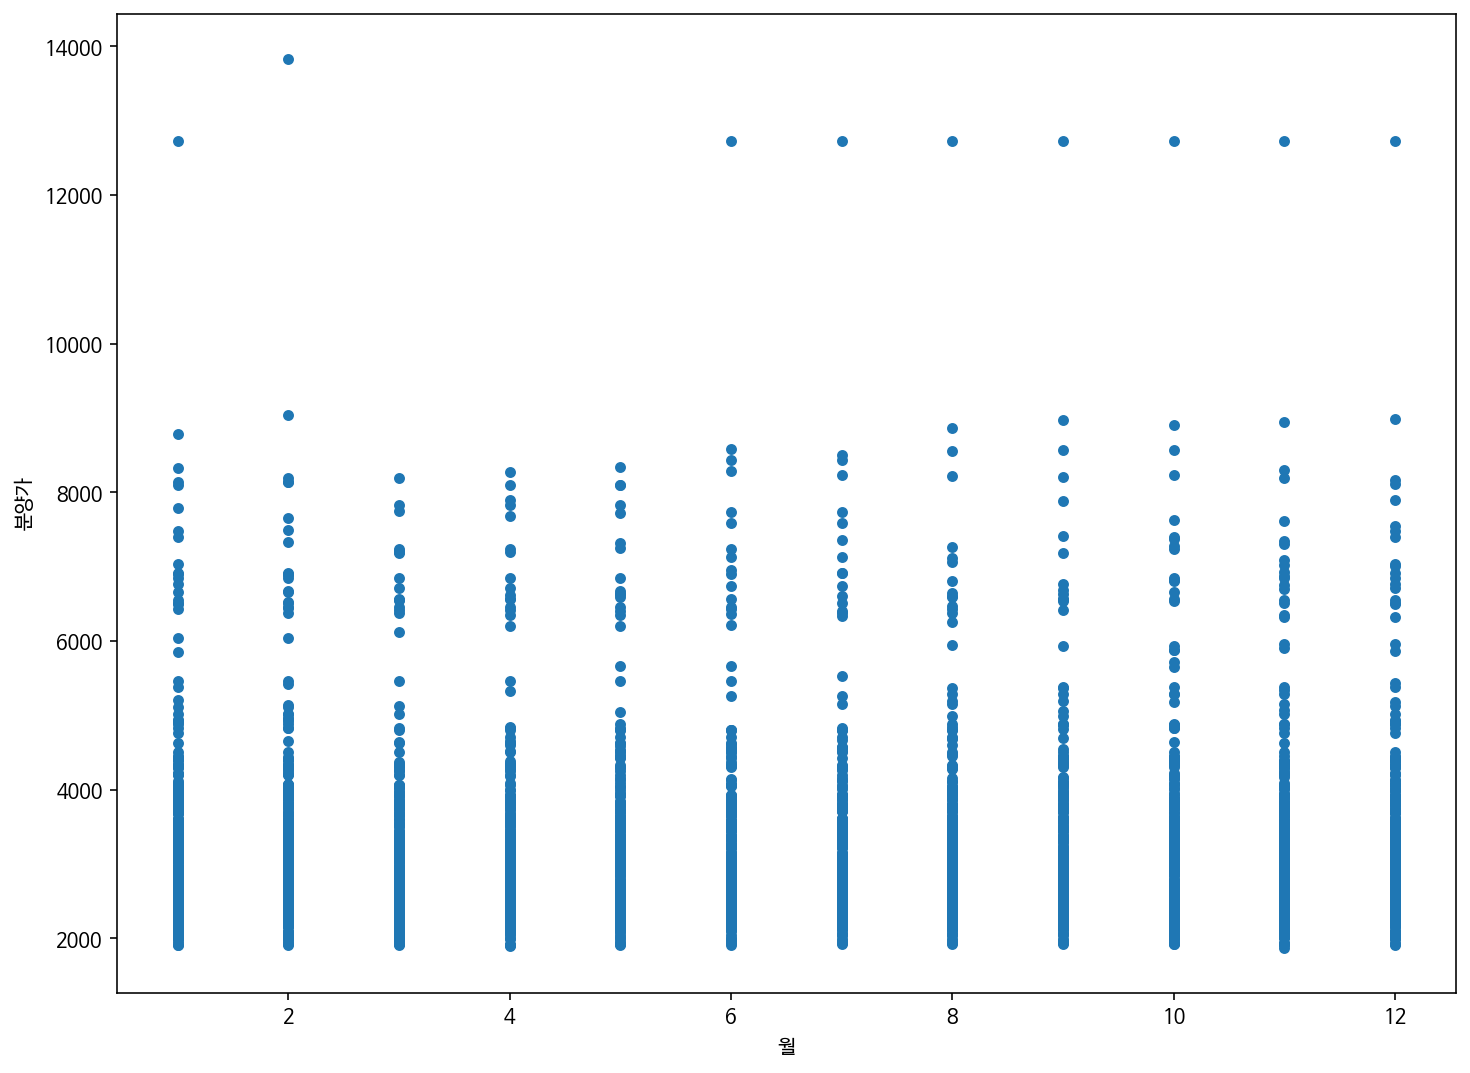

In [ ]:
df.plot(x="월",y="분양가",kind="scatter")